# Estimating Collegetown Rent Prices: A Hedonic Analysis
**A project by Nathan Blumenfeld (njb93)**  
**Made for ORIE 2380 - Urban Analytics**   
**FA 2020 // Cornell University**

## Table of Contents
1. [Introduction](#intro)  
2. [Data](#data)   
3. [Methodology](#methods)
4. [Discussion](#discussion)
5. [References](#references)

<a id="intro"></a>
## 1. Introduction

<a id="intro/problem"></a>
### 1.1 The Problem

With limited supply, often wealthy renters, and highly variable geography, it is clear that the collegetown rental market is unique. Students often consider distance to campus, ease of walking, proximity to useful bus stops and popular social locations when looking at potential housing.  
Within such a market, how do Cornell students actually value collegetown rentals? Is it possible to isolate the factors that actually drive prices, and help Cornell students find value relative to their living preferences? 

<a id="intro/overview"></a>
### 1.2 Project Overview
This project aims to discover the quanitative measures which affect rent prices in the Collegetown area by hedonic modeling and multiple linear regression. 

#### Packages Used
1. [requests](https://requests.readthedocs.io/en/master/) for handling HTTS requests
2. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for parsing website data
3. [Folium](https://python-visualization.github.io/folium/) for geospatial presentation 
4. [Pandas](https://pandas.pydata.org/) for data mangement
5. [Selenium](https://selenium-python.readthedocs.io/) for scraping dynamic sites
6. [Folium](https://python-visualization.github.io/folium/) for geographic visualization


<a id="data"></a>
## 2. Data

#### Dataset
**About the Dataset**  <br>
The Cornell University Office of Off-Campus Living maintains a pubically-accessible [database of rental listings]( https://listings.offcampusliving.cornell.edu). 

Contact Information:  
>Office of Off-Campus Living  
531 Willard Straight Hall   
Ithaca, New York 14891
(607) 254-8383  
offcampusliving@cornell.edu. 

The database allows users to filter by the following: 
> - Price (0-5000 USD)
> - Number of Bedrooms (0-10+) 
> - Pets Allowed? (Yes, No)
> - Listing Type (Any, Commencement, Fall Sublet, Graduate, Sabbatic Housing, Short-Term Housing, Spring Sublet, Staff/Faculty, Summer Sublet, Undergradate)
> - Housing Type (Rent, Room to Rent, Share)
> - Date Availible (MM-DD-YYYY)

And provides information about each individual listing under the following conventions:   
> - Address
> - Topline Description
> - Extended Description
> - Number of Bedrooms
> - Number of Bathrooms
> - Pets Allowed (yes,no)
> - Housing Type (Rent, Room to Rent, Share)
> - Listing Type (Any, Commencement, Fall Sublet, Graduate, Sabbatic Housing, Short-Term Housing, Spring Sublet, Staff/Faculty, Summer Sublet, Undergradate)
> - Rent (price per unit in USD)
> - Date Availible
> - Amenities
>       - Air Conditioning
>       - Electricity Included
>       - Electronic Payments Accepted
>       - Furnished
>       - Heat Included
>       - Internet Included
>       - Kitchen
>       - Laundry Facilities
>       - Near Bus Route
>       - Off-Street Parking Available
>       - Off-Street Parking Included
>       - Permitted Street Parking Available 
>       - Water Included
> n.b. Information related to safety standards is provided, but only for a limited number of listings and as often incomplete. For the purposes of this project, it will be ignored. 


On their [website](https://scl.cornell.edu/residential-life/housing/campus-living/landlords), The Office of Off-Campus Living offers the following information:

>Our office, in conjunction with the Student Services IT (Information Technology) department, has worked to create an entirely new listing database with great features. Notice: Properties within the City of Ithaca must have a current Certificate of Compliance with the City of Ithaca Building Department to post your listing. The system is set up to only allow listings to be paid for up the expiration date of the COC. Unlike the old system, listings do not require administrative approval to go live as the COC check is now fully automated. Listings will be searchable once they are paid for and made active by the landlord. 
> - New dynamic search pages via Google Map search or criteria search  
> - Increased security-viewers will not see contact information (email or phone) without first authenticating a Cornell University relationship 
> - Automated Certification of Compliance verification for properties within the City of Ithaca 
> - Photos and Images 
> - Multiple photos can be added to your listing 
> - Listings can be extended from 1 to 12 months (properties within the city cannot be extended past the month the COC expires.) 
> - Listings are one flat rate of 30 USD per month
> - The System has been designed to be-compatible with all major browsers and operating systems on computers, tablet and smartphones 
> - Manage your listings  
> - Activate/Inactivate
> - Verify and update Google Map location 
> - Reactivate expired listings 
> - Update property photos


**Why use this data?**    
Regression analysis often noisy and subject to error. By using a dataset of listings specifically targeted to Cornell Students, the dataset offers a useful proxy for the Cornell specific market which this project hopes to analyze. In theory, this reduces the noise associated with listings outside, and allows for a better understanding of what Cornell students for in rental housing.   

#### 2.1.2 Project Variables
Using response variable:
> - rent_price (int, per person)

The project will analyze the following as potential explanatory variables:
boolean (binary indicator variables)
> - air_conditioning 
> - pets_allowed 
> - internet_included 
> - kitchen_available 
> - laundry_available
> - internet_included
> - near_bus
> - osparking_included 
> - osparking_available
> - psparking_available
> - electricity_included
> - heat_included
> - water_included
> - furniture_included 

continuous
> - dist_to_cornell
> - bedrooms (number of bedrooms, 'studio' = 0)
> - bathrooms (number of bathrooms)
> - date_available    

These are effectively just translations of the information offered by database to prospective renters. We are trying to build a releaved-preference model, and want to rely on tangible consumer choices. 

<a id="data/collection"></a>
### 2.2 Collection

<a id="data/collection/permissions"></a>
#### 2.2.1 Web Crawling Permissions
The [robots.txt](https://en.wikipedia.org/wiki/Robots_exclusion_standard) standard is used to communicate to developers web-scraping permissions and limitations. It is good practice to follow these guidelines.  

No robots.txt file appears to exist for the specifc off-campus listing site, but [cornell.edu/robots.txt](https://www.cornell.edu/robots.txt) returns:
> User-agent: *    
<br>
Crawl-Delay: 6       
Disallow: /_dynamic_files/  
Disallow: /_tasks/  
Disallow: /test/  
Disallow: /tools/  
Disallow: /template/  
Disallow: /search/  
Disallow: /visit/plan/   
Disallow: /video/kaltura/   
Disallow: /video/tasks/   
Disallow: /server-health-check/   
...   
User-agent: Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0) SiteCheck-sitecrawl by Siteimprove.com   
Disallow: /cuinfo/specialconditions/   
Disallow: /_includes/header.cfm

and [scl.cornell.edu/robots.txt](https://scl.cornell.edu/robots.txt) (Student and Campus Life, which oversees Office of Off-Campus Living) returns:
> User-agent: *   
<br>
...   
Directories   
Disallow: /core/   
Disallow: /profiles/Files   
Disallow: /README.txt   
Disallow: /web.config   
Paths (clean URLs)   
Disallow: /admin/   
Disallow: /comment/reply    
Disallow: /filter/tips   
Disallow: /node/add/   
Disallow: /search/    
Disallow: /user/register/   
Disallow: /user/password/   
Disallow: /user/login/   
Disallow: /user/logout/   
Paths (no clean URLs)   
Disallow: /index.php/admin/     
Disallow: /index.php/search/  
Disallow: /index.php/user/password   
Disallow: /index.php/user/register/   
Disallow: /index.php/user/login/   
Disallow: /index.php/user/logout/

Looks like lisitings site can be queried without me getting expelled. Regardless, let's keep server load as minimal as possible and employ the best ethics.  

#### 2.2.2 Data Processing Functions
Using BeauitfulSoup to clean and search through website source ulitizing regular expressions.  

In [783]:
potential_amenities = {'Air Conditioning' : 'air_conditioning',
                                                'Electricity Included' : 'electricity_included',
                                                'Electronic Payments Accepted ': 'electronic_payments',
                                                'Furnished' : 'furniture_included',
                                                'Heat Included': 'heat_included',
                                               'Internet Included' : 'internet_included',
                                               'Kitchen': 'kitchen_available',
                                                'Laundry Facilities' : 'laundry_available',
                                                'Near Bus Route' : 'near_bus',
                                                'Off-Street Parking Available' : 'osparking_available',
                                                'Off-Street Parking Included' : 'osparking_included',
                                                'Permitted Street Parking Available' : 'psparking_available',
                                                'Water Included' : 'water_included'} 

potential_listtypes = {'Graduate' : 'graduate',
                                           'Staff/Faculty' : 'faculty',
                                           'Undergraduate' : 'ugrad',
                                           'Sabbatic housing' : 'sabbatical',
                                           'Fall Sublet' : 'fa_sublet',
                                           'Spring Sublet' : 'spr_sublet',
                                           'Summer Sublet' : 'sum_sublet',
                                           'Short-Term Housing' : 'short_term'}

In [782]:
def createnewDictionary():
    #creates new empty dictionary for each listing. amenities bools are default false
    new = {'listingAddress' : '',
    'unitNumber' : '',    
    'listingId' : '', 
    'rentAmount' : '', 
    'rentType' : '', 
    'bedrooms' : '', 
    'bathrooms' : '', 
    'housingType' : '', 
    'dateAvailable' : '', 
    'gmapLatitude' : '', 
    'gmapLongitude' : '', 
    'pets' : '',
    'air_conditioning' : False,
    'electricity_included' : False,
    'electronic_payments' : False,
    'furniture_included': False,
    'heat_included' : False ,
    'internet_included' : False,
    'kitchen_available' : False,
    'laundry_available' : False,
    'near_bus' : False,
    'osparking_available' : False,
    'osparking_included' : False,
    'psparking_available' : False,
    'water_included' : False,
    'faculty' : False, 
    'ugrad' : False,
    'sabbatical' : False,      
    'fa_sublet' : False, 
    'spr_sublet' : False,     
    'sum_sublet' : False,    
    'short_term' : False,
    'graduate': False}     
    return new

In [795]:
def updatenewDictionary(raw_dict, listing_dict):
    #updates dictionary for each listing
    listing_dict['listingAddress'] = raw_dict['listingAddress']
    listing_dict['unitNumber'] = raw_dict['unitNumber']
    listing_dict['listingId'] = raw_dict['listingId']
    listing_dict['rentAmount'] = raw_dict['rentAmount']
    listing_dict['rentType'] = raw_dict['rentType']
    listing_dict['bedrooms'] = raw_dict['bedrooms']
    listing_dict['bathrooms'] = raw_dict['bathrooms']
    listing_dict['housingType'] = raw_dict['housingType']
    listing_dict['dateAvailable'] = raw_dict['dateAvailable']
    listing_dict['gmapLatitude'] = raw_dict['gmapLatitude']
    listing_dict['gmapLongitude'] = raw_dict['gmapLongitude']
    listing_dict['pets'] = raw_dict['pets']
    updatenewAmenities(raw_dict, listing_dict)
    newlistingType(raw_dict, listing_dict)

In [794]:
def updatenewAmenities(raw_dict, new_dict):
    # organizes amenities into bools. 
    amenities_list = raw_dict['amenities']
    a = amenities_list.strip(" '")
    b= a.strip('][').split(', ')
    c = [i.replace('"', '') for i in b]
    for item in c:
        if item in potential_amenities.keys():
            new_dict[potential_amenities[item]] = True

In [779]:
def newlistingType(raw_dict, new_dict):
    #organizes listing types into bools. 
    types = raw_dict['listingTypes']
    a = types.strip(" '")
    b= a.strip('][').split(', ')
    c = [i.replace('"', '') for i in b]
    for item in c:
        if item in potential_listtypes.keys():
            new_dict[potential_listtypes[item]] = True    

In [838]:
def createnewDF():
    # creates an empty data frame with columns matching keys of listing dictionary. 
    frame = pd.DataFrame(
        {'listingAddress': [],
         'unitNumber': [],
         'listingId': [],
         'rentAmount': [],
         'rentType': [],
         'bedrooms': [],
         'bathrooms': [],
         'housingType': [],
         'dateAvailable': [],
         'gmapLatitude': [],
         'gmapLongitude': [],
         'pets': [],
        'air_conditioning' : [],
        'electricity_included' : [],
        'electronic_payments' : [],
        'furniture_included': [],
        'heat_included' : [] ,
        'internet_included' : [],
        'kitchen_available' : [],
        'laundry_available' : [],
        'near_bus' : [],
        'osparking_available' : [],
        'osparking_included' : [],
        'psparking_available' : [],
        'water_included' : [],
        'faculty' : [], 
        'ugrad' : [],
        'sabbatical' : [],      
        'fa_sublet' : [], 
        'spr_sublet' : [],     
        'sum_sublet' : [],    
        'short_term' : [],
        'graduate' : []},
         index = [])
    return frame

#### 2.2.3 Structuring HTTP GET Requests and DataFrame
Using requests to send HTTP GET Requests to Cornell Servers 

In [839]:
import requests
import json
import time
import pandas as pd
import numpy as np
import warnings
#warnings.filterwarnings('ignore')

In [857]:
def getnewData(start, end, url):
    #main function to retrieve data
    page_count = start
    max_page_count = end 
    listingsDF = createnewDF()
    while (page_count <= max_page_count):
        newdict = createnewDictionary()
        r = requests.get(url+str(page_count))
        try:
            rawdict = r.json()[0]
        except:
            page_count = page_count + 1
            continue
        updatenewDictionary(rawdict,newdict)
        listing_values = [*newdict.values()]
        listing_record = pd.Series(listing_values, index= listingsDF.columns)
        listingsDF = listingsDF.append(listing_record,ignore_index=True)
        time.sleep(0.01)
        page_count = page_count + 1
    return listingsDF

a = getnewData(10,10,'https://listings.offcampusliving.cornell.edu/api/listing/')

#### 2.2.4 Physical Collection
Organizing data into a single pandas DataFrame

In [843]:
listings4to499 = getnewData(4,500,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [844]:
listings500to999 = getnewData(500,1000,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [845]:
listings1000to1499 = getnewData(1000,1500,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [846]:
listings1500to1999 = getnewData(1500,2000,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [847]:
listings2000to2499 = getnewData(2000,2500,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [848]:
listings2500to2999 = getnewData(2500,3000,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [850]:
listings3000to3344 = getnewData(3000,3345,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [858]:
# merge above frames. 
all_listings = pd.concat([listings4to499, listings500to999, listings1000to1499, listings1500to1999, listings2000to2499,listings2500to2999,listings3000to3344])

#index by ID
dataset = all_listings.set_index('listingId')
dataset.columns

Index(['listingAddress', 'unitNumber', 'rentAmount', 'rentType', 'bedrooms',
       'bathrooms', 'housingType', 'dateAvailable', 'gmapLatitude',
       'gmapLongitude', 'pets', 'air_conditioning', 'electricity_included',
       'electronic_payments', 'furniture_included', 'heat_included',
       'internet_included', 'kitchen_available', 'laundry_available',
       'near_bus', 'osparking_available', 'osparking_included',
       'psparking_available', 'water_included', 'faculty', 'ugrad',
       'sabbatical', 'fa_sublet', 'spr_sublet', 'sum_sublet', 'short_term',
       'graduate'],
      dtype='object')

<a id="data/cleaning"></a>
#### 2.2.5 Cleaning the Data
Making sure dtypes are as intended, and removing faulty listings.

In [1377]:
# remove test values
not_test = dataset[dataset.unitNumber != 'test']
# remove shared and room-to-rent housing listings. too much unspecified detail
not_shared = not_test[not_test.housingType == 'Rent'] 
# remove listings with no or incorrectly listed price
real_price = not_shared[not_shared.rentAmount > 0]
# remove listings without lat,long values
no_lat = real_price[real_price['gmapLatitude'].notnull()]
no_long = no_lat[no_lat['gmapLongitude'].notnull()]
eligible_listings = no_long
eligible_listings

,listingAddress,unitNumber,rentAmount,rentType,bedrooms,bathrooms,housingType,dateAvailable,gmapLatitude,gmapLongitude,...,psparking_available,water_included,faculty,ugrad,sabbatical,fa_sublet,spr_sublet,sum_sublet,short_term,graduate
listingId,,,,,,,,,,,,,,,,,,,,,
4.0,219 Eastern Heights Drive,3,715.0,Price per Unit,1,1,Rent,2019-08-15T04:00:00.000Z,42.422104,-76.44914899999999,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6.0,203 PROSPECT STREET,None,700.0,Price per Person,6,2,Rent,2021-08-01T04:00:00.000Z,42.437400788491345,-76.49422158895493,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8.0,203 PROSPECT STREET,A,716.0,Price per Person,3,1,Rent,2017-08-01T04:00:00.000Z,42.437342,-76.494235,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
9.0,124 Crest Lane,None,2020.0,Price per Unit,3,2,Rent,2019-07-24T04:00:00.000Z,42.454325,-76.46667099999999,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10.0,1559 Slaterville Rd.,None,1850.0,Price per Unit,3,1,Rent,2017-08-01T04:00:00.000Z,42.41669162352905,-76.45285857175827,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337.0,37 Uptown Rd,Apt 1F,1219.0,Price per Unit,2,1,Rent,2021-01-15T05:00:00.000Z,42.481171,-76.473747,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3338.0,236 Bundy,None,1150.0,Price per Unit,2,1,Rent,2021-01-02T05:00:00.000Z,42.460571,-76.555095,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3339.0,1025 TIOGA STREET N,1,1000.0,Price per Unit,1,1,Rent,2020-12-13T05:00:00.000Z,42.4519355,-76.4973114,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1378]:
eligible_listings['listingAddress']= eligible_listings['listingAddress'].astype('category')
eligible_listings['rentAmount']= eligible_listings['rentAmount'].astype(float)
eligible_listings['bedrooms'] = eligible_listings['bedrooms'].replace(['studio'],0)
eligible_listings['bedrooms']= eligible_listings['bedrooms'].astype(float)
eligible_listings['bathrooms']= eligible_listings['bathrooms'].astype(float)
eligible_listings['dateAvailable']= eligible_listings['dateAvailable'].astype('datetime64')
eligible_listings['pets']= eligible_listings['pets'].astype(bool)
eligible_listings['air_conditioning'] = eligible_listings['air_conditioning'].astype(bool)
eligible_listings['electricity_included'] = eligible_listings['electricity_included'].astype(bool)
eligible_listings['electronic_payments'] = eligible_listings['electronic_payments'].astype(bool)
eligible_listings['furniture_included'] = eligible_listings['furniture_included'].astype(bool)
eligible_listings['heat_included'] = eligible_listings['heat_included'].astype(bool)
eligible_listings['internet_included'] = eligible_listings['internet_included'].astype(bool)
eligible_listings['kitchen_available'] = eligible_listings['kitchen_available'].astype(bool)
eligible_listings['laundry_available'] = eligible_listings['laundry_available'].astype(bool)
eligible_listings['near_bus'] = eligible_listings['near_bus'].astype(bool)
eligible_listings['osparking_available'] = eligible_listings['osparking_available'].astype(bool)
eligible_listings['osparking_included'] = eligible_listings['osparking_included'].astype(bool)
eligible_listings['psparking_available'] = eligible_listings['psparking_available'].astype(bool)
eligible_listings['water_included'] = eligible_listings['water_included'].astype(bool)
eligible_listings['gmapLatitude'] = eligible_listings['gmapLatitude'].astype(float)
eligible_listings['gmapLongitude'] = eligible_listings['gmapLongitude'].astype(float)
eligible_listings.dtypes

listingAddress                category
unitNumber                      object
rentAmount                     float64
rentType                        object
bedrooms                       float64
bathrooms                      float64
housingType                     object
dateAvailable           datetime64[ns]
gmapLatitude                   float64
gmapLongitude                  float64
pets                              bool
air_conditioning                  bool
electricity_included              bool
electronic_payments               bool
furniture_included                bool
heat_included                     bool
internet_included                 bool
kitchen_available                 bool
laundry_available                 bool
near_bus                          bool
osparking_available               bool
osparking_included                bool
psparking_available               bool
water_included                    bool
faculty                        float64
ugrad                    

In [949]:
import seaborn
import matplotlib.pyplot as plt

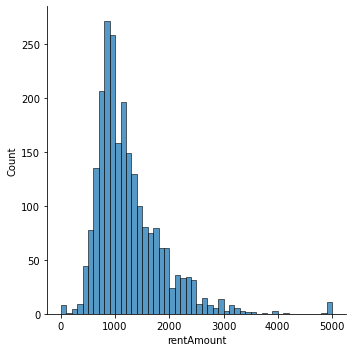

In [1379]:
seaborn.displot(eligible_listings,x='rentAmount',binwidth=100)
#positive skew

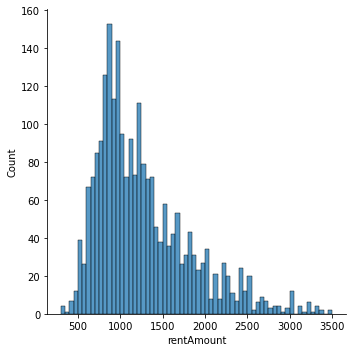

In [1380]:
#Let's remove the outliers with price > 3500
price_outliers1 = eligible_listings[eligible_listings.rentAmount <= 3500]
#and with price < 300
price_outliers2 = price_outliers1[price_outliers1.rentAmount >= 300]
eligible_listings = price_outliers2
seaborn.displot(eligible_listings,x='rentAmount',binwidth=50)

In [1381]:
len(eligible_listings)

2322

After cleaning, we are left with eligible_listings, the main dataset to analyze. 
eligble_listings contains 2317 of both inactive and active pubically-listed rentals on the Cornell Off-Campus Living site. 


### Adding Features

#### Distance to Cornell 
Using haversine function, google map data to compute a distance to McGraw Clocktower (a proxy for campus)

In [1382]:
#for each of these listings, we want to compute the haversine dist from the listing to the clocktower. 
# clocktower (lat,long): 42.44764589643703, -76.48496728637923
# haversine code from police allocation activity. 

from math import radians, cos, sin, asin, sqrt

def haversine_dist(pt1, pt2):
    lat1,lon1 = pt1
    lat2,lon2 = pt2
    
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # haversine formula
    a = sin((lat2 - lat1)/2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1)/2)**2
    c = 2 * asin(sqrt(a))
    return float(6371000*c)

In [1383]:
# clocktower (lat,long): 42.44764589643703, -76.48496728637923
import folium

hd = []
m = folium.Map(location=[42.41,-76.48],zoom_start=12)

for index, row in eligible_listings.iterrows(): 
    lat = float(row['gmapLatitude'])
    long = float(row['gmapLongitude'])
    folium.CircleMarker([lat,long], radius=0.2, color='red', opacity=0.5,).add_to(m)
    dist = (haversine_dist((lat,long),((42.44764589643703, -76.48496728637923))))
    hd.append(dist)

eligible_listings['dist_to_cornell'] = hd
eligible_listings['dist_to_cornell'] = eligible_listings['dist_to_cornell'].astype(float)
#within 5km radius of campus
within_distance = eligible_listings[eligible_listings['dist_to_cornell'] < 3000]
within_distance

,listingAddress,unitNumber,rentAmount,rentType,bedrooms,bathrooms,housingType,dateAvailable,gmapLatitude,gmapLongitude,...,water_included,faculty,ugrad,sabbatical,fa_sublet,spr_sublet,sum_sublet,short_term,graduate,dist_to_cornell
listingId,,,,,,,,,,,,,,,,,,,,,
6.0,203 PROSPECT STREET,None,700.0,Price per Person,6.0,2.0,Rent,2021-08-01 04:00:00,42.437401,-76.494222,...,False,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1369.102514
8.0,203 PROSPECT STREET,A,716.0,Price per Person,3.0,1.0,Rent,2017-08-01 04:00:00,42.437342,-76.494235,...,True,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1375.155058
9.0,124 Crest Lane,None,2020.0,Price per Unit,3.0,2.0,Rent,2019-07-24 04:00:00,42.454325,-76.466671,...,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1674.806014
11.0,346 Warren Road,1,895.0,Price per Unit,1.0,1.0,Rent,2017-08-01 04:00:00,42.464756,-76.467648,...,True,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2374.563448
15.0,506 Hanshaw Road,None,475.0,Price per Person,3.0,1.0,Rent,2018-08-16 04:00:00,42.469222,-76.490955,...,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2448.939059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333.0,523 STATE STREET E,2,1350.0,Price per Unit,2.0,1.0,Rent,2021-01-01 05:00:00,42.439092,-76.490332,...,False,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1048.117828
3335.0,116-18 EDDY STREET,116,1500.0,Price per Unit,2.0,1.0,Rent,2021-08-01 04:00:00,42.438985,-76.487604,...,True,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,987.087514
3339.0,1025 TIOGA STREET N,1,1000.0,Price per Unit,1.0,1.0,Rent,2020-12-13 05:00:00,42.451935,-76.497311,...,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1119.499084


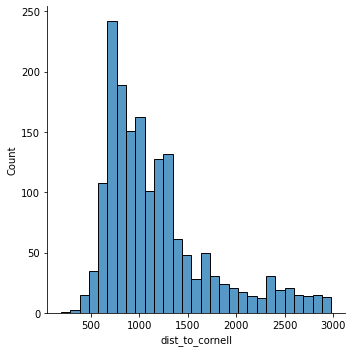

In [1385]:
seaborn.displot(within_distance,x='dist_to_cornell')

In [1386]:
# and let's take a look at that map
#clocktower in blue
#listings in red

folium.CircleMarker([42.44764589643703, -76.48496728637923], radius=0.2, color='blue', opacity=0.5,).add_to(m)
m


####  True Price
Calculating price per bedroom, if price is given per unit. 
For studio rentals, truePrice is just the listed price. 

In [1400]:
perpersonListings = within_distance[within_distance['rentType'] == 'Price per Person']
perpersonListings['truePrice'] = perpersonListings['rentAmount']

perunitListings = within_distance[within_distance['rentType'] == 'Price per Unit']

perunitStudios = perunitListings[perunitListings['bedrooms'] == 0]
perunitRest = perunitListings[perunitListings['bedrooms'] != 0]
perunitRest['truePrice'] = (perunitRest['rentAmount'] / perunitRest['bedrooms'])
perunitStudios['truePrice'] = perunitStudios['rentAmount']
len(within_distance) == len(perunitStudios) + len(perunitRest) + len(perpersonListings)

adjusted_listings = pd.concat([perunitStudios,perunitRest,perpersonListings])
adjusted_listings.sample(10)

,listingAddress,unitNumber,rentAmount,rentType,bedrooms,bathrooms,housingType,dateAvailable,gmapLatitude,gmapLongitude,...,faculty,ugrad,sabbatical,fa_sublet,spr_sublet,sum_sublet,short_term,graduate,dist_to_cornell,truePrice
listingId,,,,,,,,,,,,,,,,,,,,,
2399.0,"131 Judd Falls Rd. Ithaca, NY 14850",Apt. 1,1625.0,Price per Unit,2.0,1.0,Rent,2020-01-01 05:00:00,42.452321,-76.471243,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1240.252721,812.5
1829.0,427 SENECA STREET E,,2200.0,Price per Unit,1.0,1.0,Rent,2018-12-15 05:00:00,42.440401,-76.492613,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1021.035551,2200.0
176.0,309 EDDY STREET,5c,800.0,Price per Person,3.0,2.0,Rent,2017-06-01 04:00:00,42.440846,-76.487431,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,782.640645,800.0
1105.0,708 STEWART AVENUE,Apt. 1,845.0,Price per Person,3.0,1.0,Rent,2018-06-02 04:00:00,42.450026,-76.490806,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,547.317742,845.0
1872.0,319 DRYDEN ROAD,Apartment 1,600.0,Price per Person,1.0,1.0,Rent,2019-05-01 04:00:00,42.441221,-76.482764,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,736.899711,600.0
1506.0,132 PEARSALL PLACE,None,1100.0,Price per Unit,1.0,1.0,Rent,2018-09-01 04:00:00,42.431493,-76.490370,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1849.987729,1100.0
2006.0,504 STEWART AVENUE,C,995.0,Price per Unit,0.0,1.0,Rent,2020-06-02 04:00:00,42.443622,-76.489901,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,603.427674,995.0
2918.0,312 COLLEGE AVENUE,,2000.0,Price per Unit,1.0,1.0,Rent,2020-05-07 04:00:00,42.440966,-76.485620,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,744.679514,2000.0
628.0,113 Valentine Place,None,2320.0,Price per Unit,2.0,2.0,Rent,2021-06-10 04:00:00,42.435611,-76.485482,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1338.876782,1160.0


#### Natural Log of Price 
Take ln of price. Might be useful to have. 

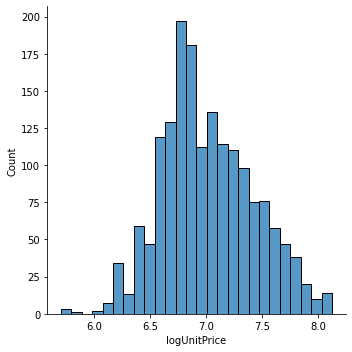

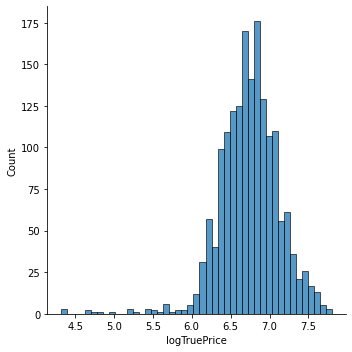

In [1401]:
# take ln of sales prices, plot
import numpy as np

ln_list = []
for index, row in adjusted_listings.iterrows(): 
    ln_price = np.log(row['rentAmount'])
    ln_list.append(ln_price)
adjusted_listings['logUnitPrice'] = ln_list
adjusted_listings['logUnitPrice'] = adjusted_listings['logUnitPrice'].astype(float)

seaborn.displot(adjusted_listings,x='logUnitPrice')

ln_list = []
for index, row in adjusted_listings.iterrows(): 
    ln_price = np.log(row['truePrice'])
    ln_list.append(ln_price)
adjusted_listings['logTruePrice'] = ln_list
adjusted_listings['logTruePrice'] = adjusted_listings['logTruePrice'].astype(float)


seaborn.displot(adjusted_listings,x='logTruePrice')
#it is common in economics to deal with log-linear models.

<a id="data/exploration)"></a>
### Initial Exploration
Using Folium and Seabord for top-level visualization

<AxesSubplot:xlabel='bedrooms', ylabel='logTruePrice'>

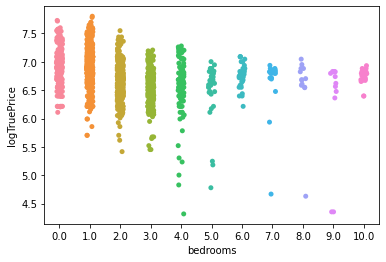

In [1402]:
seaborn.stripplot(data=adjusted_listings, x='bedrooms',y='logTruePrice')


In [1421]:
adjusted_listings.dateAvailable=pd.to_numeric(adjusted_listings.dateAvailable)
adjusted_listings.columns
regression_vars = adjusted_listings.drop(columns=['listingAddress', 'unitNumber', 'rentAmount', 'rentType', 'housingType', 'dateAvailable', 'gmapLatitude',
       'gmapLongitude', 'faculty', 'ugrad', 'sabbatical', 'fa_sublet', 'spr_sublet', 'sum_sublet', 'short_term', 'graduate', 'truePrice','logUnitPrice','pets','psparking_available'])
var_corr = regression_vars.corr()
print(var_corr)

                      bedrooms  bathrooms  air_conditioning  \
bedrooms              1.000000   0.705262         -0.217472   
bathrooms             0.705262   1.000000          0.010034   
air_conditioning     -0.217472   0.010034          1.000000   
electricity_included -0.154050  -0.087774          0.100498   
electronic_payments  -0.049927  -0.018969          0.203266   
furniture_included    0.060228   0.076363          0.124616   
heat_included        -0.210624  -0.172719          0.162868   
internet_included    -0.214578  -0.088615          0.369762   
kitchen_available     0.042824   0.054995          0.093517   
laundry_available     0.090000   0.108357          0.145780   
near_bus             -0.051170  -0.015462          0.107267   
osparking_available   0.035209   0.071383          0.039209   
osparking_included   -0.032251   0.002563         -0.002596   
water_included       -0.277763  -0.256506          0.205716   
dist_to_cornell      -0.087367  -0.000273         -0.02

<AxesSubplot:>

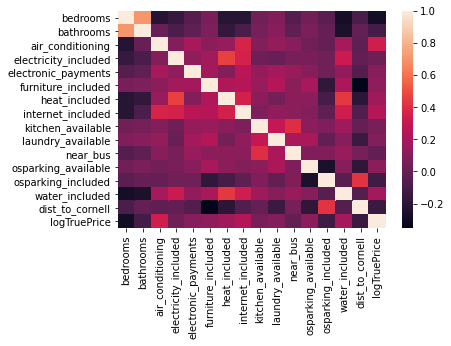

In [1422]:
seaborn.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns)
#multicollinearity among amenities. Probably best to turn into an ordinal variable of 'many amenities', 'some amenities', etc. 
#also see correlation between #bed/baths. Best bet is probably to only use one. 
# we also see that none of the explanatory variables have a particulary strong correlation with price. 

<a id="methods"></a>
## 3. Methodology

<a id="methods/overview"></a>
### 3.1 Overview
This project employes a log-linear hedonic model to evaluate listings. 

#### Model 1: Include all potential explanatory vars
Do not discriminate between explanatory variables, do not account for multicollinearity 

In [1451]:
regression_vars.columns

Index(['bedrooms', 'bathrooms', 'air_conditioning', 'electricity_included',
       'electronic_payments', 'furniture_included', 'heat_included',
       'internet_included', 'kitchen_available', 'laundry_available',
       'near_bus', 'osparking_available', 'osparking_included',
       'water_included', 'dist_to_cornell', 'logTruePrice'],
      dtype='object')

In [1433]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit = smf.ols('logTruePrice ~ bedrooms + bathrooms + dist_to_cornell+C(air_conditioning)+C(electricity_included)+C(electronic_payments)+C(furniture_included)' \
                     '+C(heat_included)+C(internet_included)+C(kitchen_available)+C(laundry_available)+C(near_bus)+C(osparking_available)+C(osparking_included)+C(water_included)',data=regression_vars).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logTruePrice   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     34.25
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.01e-86
Time:                        16:11:11   Log-Likelihood:                -543.30
No. Observations:                1700   AIC:                             1119.
Df Residuals:                    1684   BIC:                             1206.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.6822      0.055    120.884      0.000       6.574       6.791
C(air_conditioning)[T.True]         0.1671      0.019      8.887      0.000       0.130       0.204
C(electricity_included)[T.True]    -0.0983      0.021     -4.771      0.000      -0.139      -0.058
C(electronic_payments)[T.True]      0.0082      0.017      0.470      0.638      -0.026       0.042
C(furniture_included)[T.True]       0.0193      0.022      0.875      0.382      -0.024       0.063
C(heat_included)[T.True]            0.0444      0.021      2.098      0.036       0.003       0.086
C(internet_included)[T.True]        0.0757      0.020      3.785      0.000       0.036       0.115
C(kitchen_available)[T.True]        0.0974      0.054      1.815      0.070      -0.008       0.203
C(laundry_available)[T.True]        0.0310      0.027      1.158      0.247      -0.022       0.084
C(near_bus)[T.True]                -0.1233      0.033     -3.791      0.000      -0.187      -0.060
C(osparking_available)[T.True]      0.0455      0.018      2.553      0.011       0.011       0.080
C(osparking_included)[T.True]      -0.0441      0.020     -2.246      0.025      -0.083      -0.006
C(water_included)[T.True]           0.0544      0.022      2.417      0.016       0.010       0.098
bedrooms                           -0.0667      0.007     -9.897      0.000      -0.080      -0.053
bathrooms                           0.0814      0.020      4.152      0.000       0.043       0.120
dist_to_cornell                 -6.759e-05   1.77e-05     -3.825      0.000      -0.000   -3.29e-05
==============================================================================
Omnibus:                      505.003   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2728.980
Skew:                          -1.286   Prob(JB):                         0.00
Kurtosis:                       8.649   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 2: Consider Only number of Bedrooms and Certain Amenities.


<AxesSubplot:xlabel='dist_to_cornell', ylabel='logTruePrice'>

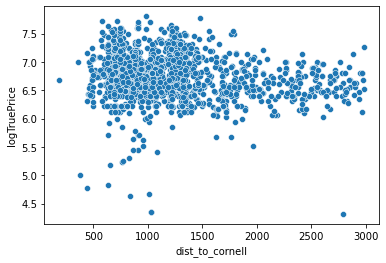

In [1444]:
seaborn.scatterplot(data=regression_vars,x='dist_to_cornell',y='logTruePrice')
# doesn't appear to be much in the way of correlation

<AxesSubplot:xlabel='bedrooms', ylabel='logTruePrice'>

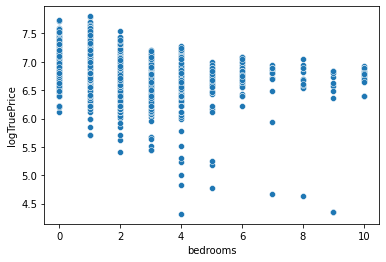

In [1435]:
seaborn.scatterplot(data=regression_vars,x='bedrooms',y='logTruePrice')


<AxesSubplot:xlabel='air_conditioning', ylabel='logTruePrice'>

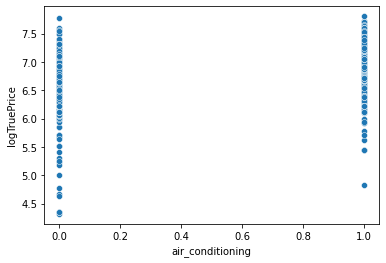

In [1436]:
seaborn.scatterplot(data=regression_vars,x='air_conditioning',y='logTruePrice')

In [1448]:
fit = smf.ols('logTruePrice ~ bedrooms +bathrooms + C(kitchen_available) + C(air_conditioning) +C(internet_included)+ C(near_bus)',data=regression_vars).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logTruePrice   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     64.89
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.01e-72
Time:                        16:20:52   Log-Likelihood:                -593.66
No. Observations:                1700   AIC:                             1201.
Df Residuals:                    1693   BIC:                             1239.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.6345      0.051    130.393      0.000       6.535       6.734
C(kitchen_available)[T.True]     0.1574      0.053      2.983      0.003       0.054       0.261
C(air_conditioning)[T.True]      0.1844      0.019      9.699      0.000       0.147       0.222
C(internet_included)[T.True]     0.0890      0.018      4.817      0.000       0.053       0.125
C(near_bus)[T.True]             -0.1218      0.033     -3.705      0.000      -0.186      -0.057
bedrooms                        -0.0596      0.007     -8.764      0.000      -0.073      -0.046
bathrooms                        0.0622      0.020      3.158      0.002       0.024       0.101
==============================================================================
Omnibus:                      452.906   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2191.615
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       8.042   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="discussion"></a>
## 4. Discussion

<a id="discussion/findings"></a>
###  Primary Findings
Both Model 1 and Model 2 fail to account for the majority of changes in listing price. Model 1 had an associated r-squared value of 0.234, and Model 2 of 0.187.  While the method of hedonic modeling is well-established in evaluating real-estate prices, the data lifted from the Off-Campus Living listings site does not appear to yield much in the way of significant results. It does appear that the presence of a kitchen and of air conditioning has the greatest positive effects on price, and as does the number of bedrooms on price per person. While models evaluated can only reasonably account for about 20% of observed price changes, given the F-Statistics of both models, it is unlikey that they are purely the result of noise: they do not fit the data to a great extent, but rather more confidently account for a small change in price. 

This could be on part of a couple different factors. The first is that renters, and especially Cornell renters, might be more likely to be low-information buyers.   
With limited information, lack of experience in searching for houses, lack of long-term commitment in the property itself, and a busy schedule, it is not unlikely that Cornell students simply do not evaluate each listing with great scrutiny. It is also the probability that the models are missing a number of important data points. The listing site does not give customers the square footage of each listing, a normally fundamental data point in evaluating properties. The model also does not account for local attractions and points of interest. Listings near popular bars or resturants may be more attractive to buyers. 

The main lessons that can be taken as a buyer from this project are: 1. Living with friends will reduce your cost on a per person basis. 2. Air conditioning comes at a premimum, and 3. Distance to Cornell does not appear to significant affect price, so feel free to look at listings near campus. 


<a id="discussion/improvements"></a>
### Potential Improvements
Some potential improvements to the project:
- Using sales data instead of advertised listing data to better match student revealed preference
- Employ Principle Component Analysis to better find indicator variables.  
- Employ natural language processing (NLP) to analyze listing descriptions and find consumer preferences. 

<a id="discussion/future"></a>
###  Future Study
The data in question merits more study. Some interesting studies to conduct in the futute might include:
- classificaiton research to find good deals and present information similarly to seekgreek.   
- application of more complicated machine learning methods (random forest, KNN) to find future insights.    
- more detailed study on Ithaca area real estate market as whole

<a id="references"></a>
## 5. References

- https://cornellsun.com/2020/03/06/as-students-struggle-to-find-housing-three-ilr-juniors-form-new-ithaca-tenants-union/
- https://www.ithaca.com/news/why-is-ithaca-one-of-the-least-affordable-us-cities/article_e67f68f4-cb0e-11e3-9571-001a4bcf887a.html
- https://ithacavoice.com/2017/02/cornell-maximum-capacity-pay-collegetown-rents-almost-2k/
- https://ncre.cornell.edu/what-north-campus-residential-expansion
- https://www.huduser.gov/portal/publications/pdf/CMAR_IthacaNY.pdf